<img src="data/banner-luvoir1.png">
This notebook implements Figure 6.3 of the LUVOIR interim report, showing nomimal LUMOS ETCs and a distribution of QSOs that are accessible in a fixed time. 

In [18]:
import numpy as np
from astropy.table import Table, Column, QTable
from matplotlib import pyplot as plt
%matplotlib notebook 

In [19]:
## function to read in the ETC file
def readLumosEtc(infil):
    t=Table.read(infil,format='ascii')
    wave = t['wave']
    flux = t['flux']
    s2n = t['sn']

    return wave,flux,s2n

In [20]:
def stitchSN(w,s1,s2,s3,s4):
    #define wavelength breakpoints: the gratings each are superior to each other
    #in certain places.

    bp150 = 1475.
    bp180 = 1765.
    bp300 = 2012.

    s2n =np.zeros(w.size)

    s2n[np.where(w < bp150)] = s1[np.where(w < bp150)]
    s2n[np.where((w > bp150) & (w < bp180))] = s2[np.where((w > bp150) & (w < bp180))]
    s2n[np.where((w > bp180) & (w < bp300))] = s3[np.where((w > bp180) & (w < bp300))]
    s2n[np.where(w > bp300)] = s4[np.where(w > bp300)]

    return s2n

In [21]:
##  main program.  start by reading in the dr7--Galex match file
##  pull in the redshifts and NUV or FUV mags
dr7qso = QTable.read('data/dr7_qso_galex.fits')
zem = dr7qso['Z'][0]
fuv = dr7qso['FUV_MAG'][0]
nuv = dr7qso['NUV_MAG'][0]

In [22]:
## define rest wavelengths for ions of interest (in order of ionization)
restwave = np.array([1216.,1548.,1035.,770.,610.])

## define the LUMOS 'realm' bounded from above by the ground
minwave = 1000.
maxwave = 4000.


In [23]:
apscale_4 = np.sqrt((4*4)/(15.*15.))
apscale_65 = np.sqrt((6.5*6.5)/(15.*15.))
apscale_9 = np.sqrt((9*9)/(15.*15.))

In [24]:
w,f,s120 = readLumosEtc('data/ETC_Files/flat_18_g120M_15.txt')
w,f,s150 = readLumosEtc('data/ETC_Files/flat_18_g150M_15.txt')
w,f,s180 = readLumosEtc('data/ETC_Files/flat_18_g180M_15.txt')
w,f,s300 = readLumosEtc('data/ETC_Files/flat_18_g300M_15.txt')
stitch_180_15 = stitchSN(w,s120,s150,s180,s300)
stitch_180_9 = stitchSN(w,s120,s150,s180,s300)*apscale_9
stitch_180_65 = stitchSN(w,s120,s150,s180,s300)*apscale_65
stitch_180_4 = stitchSN(w,s120,s150,s180,s300)*apscale_4

In [25]:
w,f,s120 = readLumosEtc('data/ETC_Files/flat_18.5_g120M_15.txt')
w,f,s150 = readLumosEtc('data/ETC_Files/flat_18.5_g150M_15.txt')
w,f,s180 = readLumosEtc('data/ETC_Files/flat_18.5_g180M_15.txt')
w,f,s300 = readLumosEtc('data/ETC_Files/flat_18.5_g300M_15.txt')
stitch_185_15 = stitchSN(w,s120,s150,s180,s300)
stitch_185_9 = stitchSN(w,s120,s150,s180,s300)*apscale_9
stitch_185_65 = stitchSN(w,s120,s150,s180,s300)*apscale_65
stitch_185_4 = stitchSN(w,s120,s150,s180,s300)*apscale_4

In [26]:
w,f,s120 = readLumosEtc('data/ETC_Files/flat_19_g120M_15.txt')
w,f,s150 = readLumosEtc('data/ETC_Files/flat_19_g150M_15.txt')
w,f,s180 = readLumosEtc('data/ETC_Files/flat_19_g180M_15.txt')
w,f,s300 = readLumosEtc('data/ETC_Files/flat_19_g300M_15.txt')
stitch_190_15 = stitchSN(w,s120,s150,s180,s300)
stitch_190_9 = stitchSN(w,s120,s150,s180,s300)*apscale_9
stitch_190_65 = stitchSN(w,s120,s150,s180,s300)*apscale_65
stitch_190_4 = stitchSN(w,s120,s150,s180,s300)*apscale_4

In [27]:
w,f,s120 = readLumosEtc('data/ETC_Files/flat_19.5_g120M_15.txt')
w,f,s150 = readLumosEtc('data/ETC_Files/flat_19.5_g150M_15.txt')
w,f,s180 = readLumosEtc('data/ETC_Files/flat_19.5_g180M_15.txt')
w,f,s300 = readLumosEtc('data/ETC_Files/flat_19.5_g300M_15.txt')
stitch_195_15 = stitchSN(w,s120,s150,s180,s300)
stitch_195_9 = stitchSN(w,s120,s150,s180,s300)*apscale_9
stitch_195_65 = stitchSN(w,s120,s150,s180,s300)*apscale_65
stitch_195_4 = stitchSN(w,s120,s150,s180,s300)*apscale_4

In [28]:
w,f,s120 = readLumosEtc('data/ETC_Files/flat_20_g120M_15.txt')
w,f,s150 = readLumosEtc('data/ETC_Files/flat_20_g150M_15.txt')
w,f,s180 = readLumosEtc('data/ETC_Files/flat_20_g180M_15.txt')
w,f,s300 = readLumosEtc('data/ETC_Files/flat_20_g300M_15.txt')
stitch_200_15 = stitchSN(w,s120,s150,s180,s300)
stitch_200_9 = stitchSN(w,s120,s150,s180,s300)*apscale_9
stitch_200_65 = stitchSN(w,s120,s150,s180,s300)*apscale_65
stitch_200_4 = stitchSN(w,s120,s150,s180,s300)*apscale_4

In [29]:
w,f,s120 = readLumosEtc('data/ETC_Files/flat_20.5_g120M_15.txt')
w,f,s150 = readLumosEtc('data/ETC_Files/flat_20.5_g150M_15.txt')
w,f,s180 = readLumosEtc('data/ETC_Files/flat_20.5_g180M_15.txt')
w,f,s300 = readLumosEtc('data/ETC_Files/flat_20.5_g300M_15.txt')
stitch_205_15 = stitchSN(w,s120,s150,s180,s300)
stitch_205_9 = stitchSN(w,s120,s150,s180,s300)*apscale_9
stitch_205_65 = stitchSN(w,s120,s150,s180,s300)*apscale_65
stitch_205_4 = stitchSN(w,s120,s150,s180,s300)*apscale_4

In [30]:
##find the quasars
qin_18 = np.where((fuv > 10) & (fuv < 18) )
qin_18 = qin_18[0]
zem_18 = zem[qin_18]
fuv_18 = fuv[qin_18]

qin_19 = np.where((fuv >= 18.0) & (fuv < 19) )
qin_19 = qin_19[0]
zem_19 = zem[qin_19]
fuv_19 = fuv[qin_19]


qin_20 = np.where((fuv >= 19.0) & (fuv < 20) )
qin_20 = qin_20[0]
zem_20 = zem[qin_20]
fuv_20 = fuv[qin_20]

qin_21 = np.where((fuv >= 20.0) & (fuv < 21) )
qin_21 = qin_21[0]
zem_21 = zem[qin_21]
fuv_21 = fuv[qin_21]

<IPython.core.display.Javascript object>


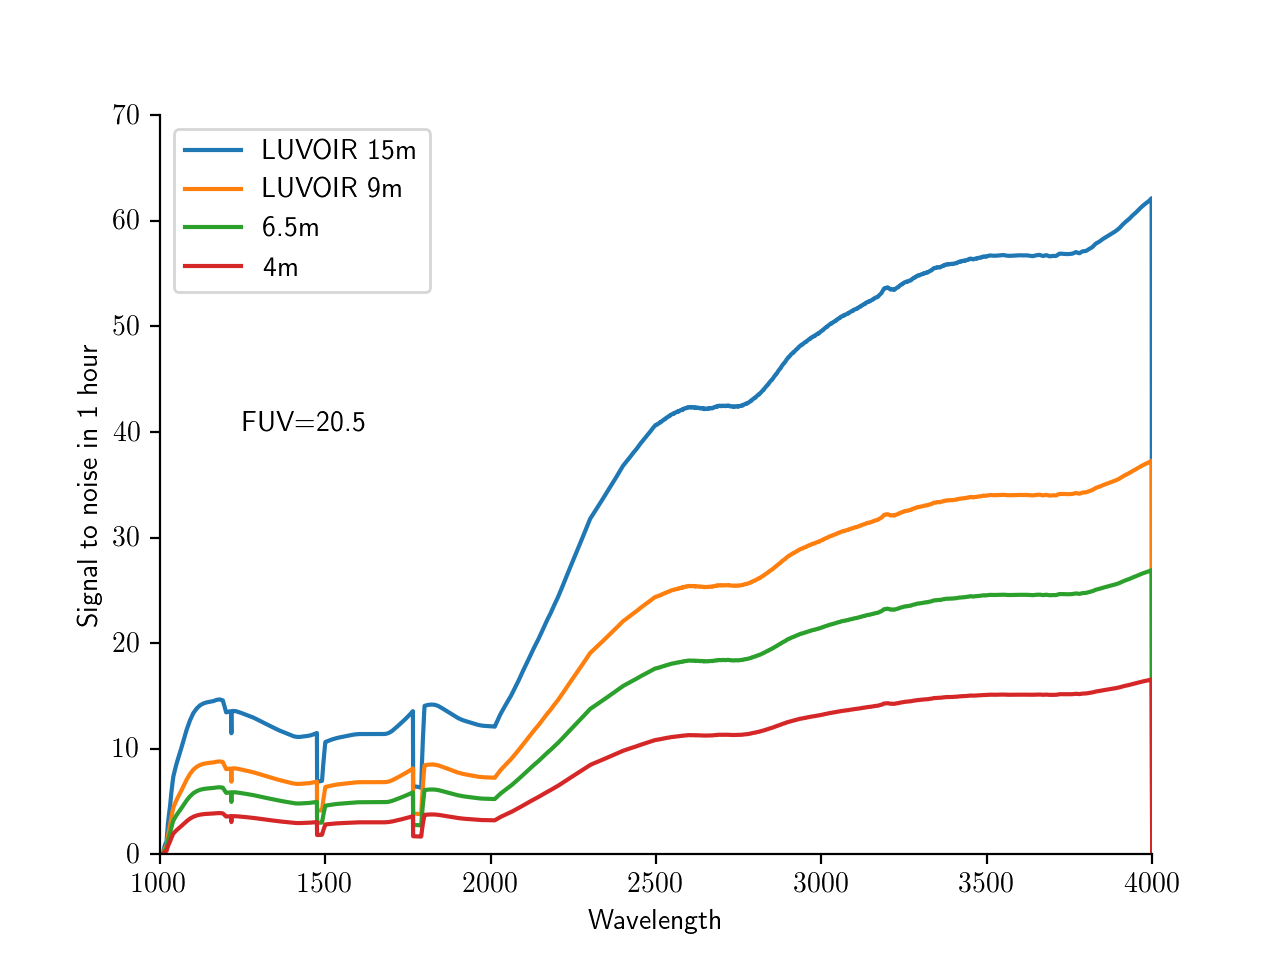

In [31]:
plt.style.context('seaborn')
ax2=plt.subplot(111)
ax2.spines["top"].set_visible(False)
ax2.spines["right"].set_visible(False)
ax2.get_xaxis().tick_bottom()
ax2.get_yaxis().tick_left()
ax2.plot(w,stitch_205_15,label='LUVOIR 15m')
ax2.plot(w,stitch_205_9,label='LUVOIR 9m')
ax2.plot(w,stitch_205_65,label='6.5m')
ax2.plot(w,stitch_205_4,label='4m')
ax2.set_xlim(1000.,4000.)
ax2.set_ylim(0.,70.)
ax2.set_xlabel("Wavelength")
ax2.set_ylabel("Signal to noise in 1 hour")
ax2.text(1250,40,'FUV=20.5')
ax2.legend()
plt.savefig('LUMOS_etc.png')